# IT Educational Institute

In [1]:
# Constants
DF_PATH = "../data/processed/1_preprocessed_df.pkl"
FEATURES_PATH = "../data/processed/features_skills_clusters.pkl"

ROLE_COLS = ['DevType']
TECH_COLS = ['LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith',
            'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith',
            'MiscTechHaveWorkedWith', 'ToolsTechHaveWorkedWith',
            'NEWCollabToolsHaveWorkedWith']

EXPORT_PATH = "../data/processed/2_cleaned_data.pkl"

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

## Read Data and Preprocess

In [3]:
# Reading data
processed_df = pd.read_pickle(DF_PATH)
features_df = pd.read_pickle(FEATURES_PATH)

In [4]:
# Displaying first 5 osbervations of processed_df
processed_df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,[],NaN,[],NaN,[],[],[],NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"[Employed, full-time]",Fully remote,"[Hobby, Contribute to open-source projects]",NaN,[],[],[],NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","[Employed, full-time]","Hybrid (some remote, some in-person)",[Hobby],"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","[Books / Physical media, Friend or family memb...","[Technical documentation, Blogs, Programming G...",[],14.0,...,NaN,NaN,NaN,[],NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"[Employed, full-time]",Fully remote,[I don’t code outside of work],"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","[Books / Physical media, School (i.e., Univers...",[],[],20.0,...,NaN,NaN,NaN,[],NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"[Employed, full-time]","Hybrid (some remote, some in-person)",[Hobby],"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","[Other online resources (e.g., videos, blogs, ...","[Technical documentation, Blogs, Stack Overflo...",[],8.0,...,NaN,NaN,NaN,[],NaN,NaN,NaN,Too long,Easy,NaN


In [5]:
# Displaying first 5 osbervations of features_df
features_df.head()

,skills_group_0,skills_group_1,skills_group_10,skills_group_11,skills_group_12,skills_group_2,skills_group_3,skills_group_4,skills_group_5,skills_group_6,skills_group_7,skills_group_8,skills_group_9
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,2,0,0,0,0,0,0,0,0,0,0,0
2,0,3,0,0,0,0,2,4,0,1,0,0,0
3,0,3,0,0,0,0,0,8,0,0,0,0,0
4,0,7,0,0,2,1,0,9,3,0,0,0,1


### One-Hot Encoding

In [6]:
# Importing MultiLabelBinarizer from sklearn
from sklearn.preprocessing import MultiLabelBinarizer

# Applying One-Hot Encoding
encoded_dfs = {}
for col in ROLE_COLS + TECH_COLS:
    binarizer = MultiLabelBinarizer()
    encoded_df = pd.DataFrame(binarizer.fit_transform(processed_df[col]), 
                                                          columns=binarizer.classes_,
                                                          index=processed_df[col].index)
    encoded_dfs[col] = encoded_df
    
# Merging One-Hot Encoded data
encoded_dfs = pd.concat(encoded_dfs, axis=1)

In [7]:
# Displaying first 5 osbervations of encoded_dfs
encoded_dfs.head()

DevType                                           \
  Academic researcher Blockchain Cloud infrastructure engineer   
0                   0          0                             0   
1                   0          0                             0   
2                   0          0                             0   
3                   0          0                             0   
4                   0          0                             0   

                                                                          \
  Data or business analyst Data scientist or machine learning specialist   
0                        0                                             0   
1                        0                                             0   
2                        0                                             1   
3                        0                                             0   
4                        0                                             0   

                                                                           \
  Database administrator Designer DevOps specialist Developer, QA or test   
0                      0        0                 0                     0   
1                      0        0                 0                     0   
2                      0        0                 0                     0   
3                      0        0                 0                     0   
4                      0        0                 0                     1   

                       ... NEWCollabToolsHaveWorkedWith                  \
  Developer, back-end  ...                        Rider RubyMine Spyder   
0                   0  ...                            0        0      0   
1                   0  ...                            0        0      0   
2                   0  ...                            0        0      0   
3                   0  ...                            0        0      0   
4                   1  ...                            0        0      0   

                                                                             
  Sublime Text TextMate Vim Visual Studio Visual Studio Code Webstorm Xcode  
0            0        0   0             0                  0        0     0  
1            0        0   0             0                  0        0     0  
2            0        0   0             1                  0        0     0  
3            0        0   0             1                  1        0     0  
4            0        0   0             1                  1        0     1  

[5 rows x 190 columns]

### Sanity Check

In [8]:
# Select random integer
i = np.random.randint(processed_df.shape[0])

# Print original values
print(processed_df.iloc[i][ROLE_COLS].tolist())
print(processed_df.iloc[i][TECH_COLS].tolist())
print('-'*100)

# Print encoded values
print(encoded_dfs.iloc[i][encoded_dfs.iloc[i] == 1])
print('-'*100)

# Check clustering
print("Clusters:", features_df.iloc[i].sum())
print("Skills:", encoded_dfs[TECH_COLS].iloc[i].sum())

[['Developer, full-stack', 'Student', 'Developer, game or graphics']]
[['C#', 'C++', 'HTML/CSS', 'Java', 'PHP', 'SQL'], ['MariaDB', 'MySQL'], [], ['ASP.NET', 'ASP.NET Core ', 'Blazor', 'jQuery', 'Node.js'], ['.NET'], ['Unity 3D'], ['Notepad++', 'Rider', 'Visual Studio', 'Visual Studio Code']]
----------------------------------------------------------------------------------------------------
DevType                       Developer, full-stack          1
                              Developer, game or graphics    1
                              Student                        1
LanguageHaveWorkedWith        C#                             1
                              C++                            1
                              HTML/CSS                       1
                              Java                           1
                              PHP                            1
                              SQL                            1
DatabaseHaveWorkedWith        MariaDB 

### Excluding Roles

In [9]:
# Checking values to exclude
encoded_dfs['DevType'].columns

Index(['Academic researcher', 'Blockchain', 'Cloud infrastructure engineer',
       'Data or business analyst',
       'Data scientist or machine learning specialist',
       'Database administrator', 'Designer', 'DevOps specialist',
       'Developer, QA or test', 'Developer, back-end',
       'Developer, desktop or enterprise applications',
       'Developer, embedded applications or devices', 'Developer, front-end',
       'Developer, full-stack', 'Developer, game or graphics',
       'Developer, mobile', 'Educator', 'Engineer, data',
       'Engineer, site reliability', 'Engineering manager',
       'Marketing or sales professional', 'Other (please specify):',
       'Product manager', 'Project manager', 'Scientist',
       'Security professional', 'Senior Executive (C-Suite, VP, etc.)',
       'Student', 'System administrator'],
      dtype='object')

In [10]:
# Creating a list of roles to exclude from the role values
EXCLUDE_ROLES = ['Educator', 'Engineer, site reliability', 'Engineering manager', 
                 'Marketing or sales professional', 
                 'Designer', 'Other (please specify):', 'Product manager',
                 'Project manager', 'Senior Executive (C-Suite, VP, etc.)', 'Student']

In [11]:
# Dropping rows with exluded roles
for role in EXCLUDE_ROLES:
    encoded_dfs = encoded_dfs.drop(('DevType', role), axis=1)

In [12]:
# Checking the total samples of roles
original_role_sum = encoded_dfs['DevType'].sum(axis=0)
original_role_sum.sort_values(ascending=False)

Developer, full-stack                            28701
Developer, back-end                              26595
Developer, front-end                             15915
Developer, desktop or enterprise applications     9546
Developer, mobile                                 7634
DevOps specialist                                 6170
Cloud infrastructure engineer                     5283
Database administrator                            4934
System administrator                              4908
Developer, embedded applications or devices       3923
Engineer, data                                    3600
Data scientist or machine learning specialist     3424
Data or business analyst                          3201
Developer, QA or test                             3096
Academic researcher                               2709
Security professional                             1928
Developer, game or graphics                       1837
Scientist                                         1762
Blockchain

### Filter Data

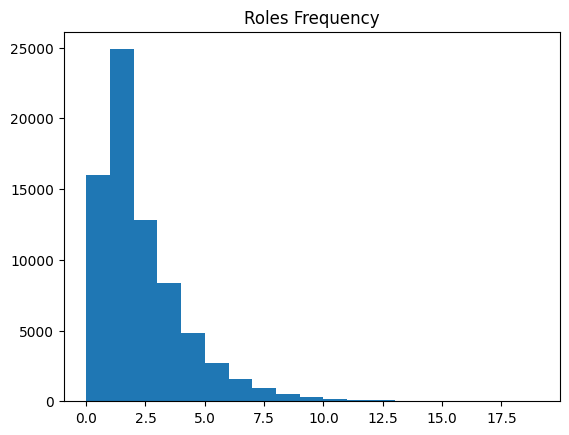

In [13]:
# Plotting a histogram reperesnting the frequency of each role
freq_roles = encoded_dfs[ROLE_COLS].sum(axis=1)
plt.hist(freq_roles, freq_roles.max())
plt.title('Roles Frequency')
plt.show()

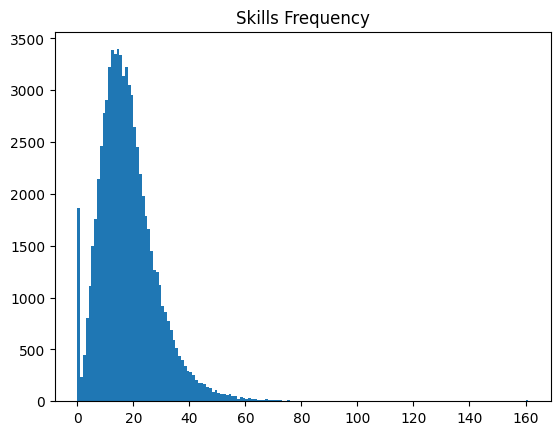

In [14]:
# Plotting a histogram reperesnting the frequency of each skill
freq_tech = encoded_dfs[TECH_COLS].sum(axis=1)
plt.hist(freq_tech, freq_tech.max())
plt.title('Skills Frequency')
plt.show()

In [15]:
# Filtering frequencies
ROLES_RANGE = [1, 3]
TECH_RANGE = [3, 30]

In [16]:
# Create masks
ROLE_MASK = (freq_roles >= ROLES_RANGE[0]) & (freq_roles <= ROLES_RANGE[1])
TECH_MASK = (freq_tech >= TECH_RANGE[0]) & (freq_tech <= TECH_RANGE[1])
FILTER_MASK = ROLE_MASK & TECH_MASK

In [17]:
# Applying filters to features_df and encoded_dfs
features_df = features_df.loc[FILTER_MASK].copy()
encoded_dfs = encoded_dfs.loc[FILTER_MASK].copy()

In [18]:
# Checking the total samples of roles
cleaned_role_sum = encoded_dfs['DevType'].sum(axis=0)
cleaned_role_sum.sort_values(ascending=False)

Developer, full-stack                            17510
Developer, back-end                              15692
Developer, front-end                              7927
Developer, desktop or enterprise applications     4328
Developer, mobile                                 3703
DevOps specialist                                 2382
Cloud infrastructure engineer                     1994
Data scientist or machine learning specialist     1889
Developer, embedded applications or devices       1803
Engineer, data                                    1627
Academic researcher                               1535
System administrator                              1404
Data or business analyst                          1313
Database administrator                            1037
Developer, QA or test                             1024
Scientist                                          911
Developer, game or graphics                        810
Security professional                              585
Blockchain

## Merge & Export Data

In [19]:
# Adding second level indexing
features_df.columns = pd.MultiIndex.from_product([['skills_clusters'], features_df.columns])

In [20]:
# Concatenating to create final DataFrame
df = pd.concat([encoded_dfs, features_df], axis=1)

# Displaying first 5 observations of the DataFrame
df.head()

DevType                                           \
   Academic researcher Blockchain Cloud infrastructure engineer   
2                    0          0                             0   
3                    0          0                             0   
7                    0          0                             0   
9                    0          0                             0   
10                   0          0                             0   

                                                                           \
   Data or business analyst Data scientist or machine learning specialist   
2                         0                                             1   
3                         0                                             0   
7                         0                                             0   
9                         0                                             0   
10                        0                                             0   

                                                                   \
   Database administrator DevOps specialist Developer, QA or test   
2                       0                 0                     0   
3                       0                 0                     0   
7                       0                 0                     0   
9                       0                 0                     0   
10                      0                 0                     0   

                                                                      ...  \
   Developer, back-end Developer, desktop or enterprise applications  ...   
2                    0                                             0  ...   
3                    0                                             0  ...   
7                    0                                             0  ...   
9                    0                                             1  ...   
10                   1                                             0  ...   

   skills_clusters                                                \
   skills_group_11 skills_group_12 skills_group_2 skills_group_3   
2                0               0              0              2   
3                0               0              0              0   
7                0               0              1              0   
9                0               2              1              0   
10               0               0              3              0   

                                                                               \
   skills_group_4 skills_group_5 skills_group_6 skills_group_7 skills_group_8   
2               4              0              1              0              0   
3               8              0              0              0              0   
7               3              1              3              4              0   
9               0              2              0              1              2   
10             10              0              1              0              0   

                   
   skills_group_9  
2               0  
3               0  
7               2  
9               0  
10              0  

[5 rows x 193 columns]

In [21]:
# Exporting final DataFrame
df.to_pickle(EXPORT_PATH)